In [167]:
# Import our dependencies
import pandas as pd
from pathlib import Path
import sklearn as skl
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [182]:
#import data
merged_df=pd.read_csv(Path('CV_cigaretee.csv'))

In [183]:
merged_df.head()

,Year-State,Inactive-Female,Inactive-Male,Inactive-Overall,Obese-Female,Obese-Male,Obese-Overall,Diabetic-Female,Diabetic-Male,Diabetic-Overall,...,Major CV Disease-Overall,current_overall,current_female,current_male,Never_overall,Never_female,Never_male,Former_overall,Former_female,Former_male
0,2011-AL,65.7,70.6,68.0,32.9,32.9,32.9,11.4,10.4,10.8,...,9.9,24.3,21.0,28.0,50.6,58.8,41.5,25.1,20.1,30.5
1,2011-AK,75.8,79.8,77.9,27.6,28.6,28.1,8.6,8.1,8.4,...,6.5,22.9,23.0,22.9,49.1,52.2,46.2,27.9,24.9,30.8
2,2011-AZ,75.9,76.3,76.1,26.7,24.9,25.7,8.1,10.0,9.0,...,7.8,19.3,17.5,21.0,55.9,61.3,50.3,24.9,21.1,28.7
3,2011-AR,67.2,72.9,70.0,32.4,31.0,31.6,9.7,11.2,10.4,...,9.8,27.0,25.2,28.9,47.9,53.0,42.6,25.1,21.8,28.6
4,2011-CA,80.1,81.8,80.9,25.1,23.9,24.6,7.9,9.2,8.4,...,6.6,13.7,10.0,17.3,62.5,70.1,54.8,23.9,19.9,27.9


In [184]:
# define X (inputs) and y (target/output)
X = merged_df.drop(columns = ["Year-State","Major CV Disease-Overall"], axis=1)
y = merged_df[['Major CV Disease-Overall']]

In [185]:
print(X.shape, y.shape)

(407, 29) (407, 1)


In [186]:
X = np.array(X)
y = np.array(y)

In [187]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(305, 29) (102, 29) (305, 1) (102, 1)


In [188]:
from sklearn.preprocessing import MinMaxScaler
# Create scaler instance
min_max_scaler = MinMaxScaler()

X_scaler = min_max_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [189]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [190]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=29))

In [191]:
# Add our hidden layer layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu"))

In [192]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

In [193]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 5)                 150       
                                                                 
 dense_28 (Dense)            (None, 5)                 30        
                                                                 
 dense_29 (Dense)            (None, 1)                 6         
                                                                 
Total params: 186 (744.00 Byte)
Trainable params: 186 (744.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [194]:
# Compile the Sequential model together and customize metrics
nn_model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Fit the model to the training data
fit_model = nn_model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=100,
                    verbose=1)

Epoch 1/100
10/10 [==============================] - 0s 15ms/step - loss: 26.1686 - mae: 4.0185 - val_loss: 8.7816 - val_mae: 2.3471
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 8.7447 - mae: 2.2975 - val_loss: 8.0756 - val_mae: 2.1481
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 7.3438 - mae: 2.0883 - val_loss: 7.0434 - val_mae: 1.9969
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 6.1845 - mae: 1.9316 - val_loss: 5.6815 - val_mae: 1.8244
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 5.3558 - mae: 1.7715 - val_loss: 5.6736 - val_mae: 1.7674
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 4.6532 - mae: 1.6370 - val_loss: 4.4391 - val_mae: 1.7283
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 4.1009 - mae: 1.5661 - val_loss: 3.6987 - val_mae: 1.5389
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 3.6978 -

10/10 [==============================] - 0s 4ms/step - loss: 0.5088 - mae: 0.5569 - val_loss: 0.4737 - val_mae: 0.5643
Epoch 64/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5527 - mae: 0.5642 - val_loss: 0.4449 - val_mae: 0.5127
Epoch 65/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4388 - mae: 0.5143 - val_loss: 0.5076 - val_mae: 0.5507
Epoch 66/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5125 - mae: 0.5643 - val_loss: 0.7208 - val_mae: 0.6859
Epoch 67/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5051 - mae: 0.5684 - val_loss: 0.4453 - val_mae: 0.5105
Epoch 68/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4624 - mae: 0.5292 - val_loss: 0.8582 - val_mae: 0.7942
Epoch 69/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5300 - mae: 0.5779 - val_loss: 0.4849 - val_mae: 0.5459
Epoch 70/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4711 - mae: 0

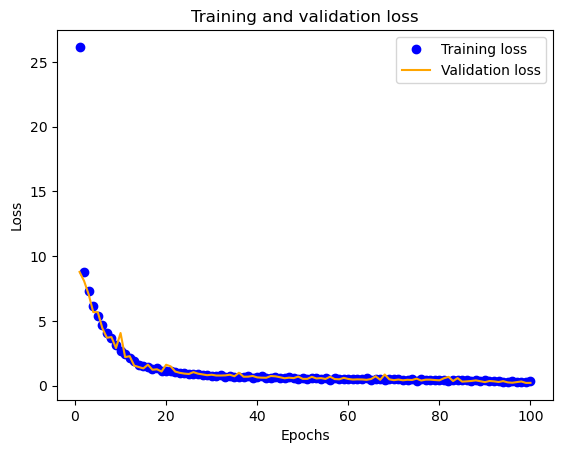

In [195]:
history_dict = fit_model.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

4/4 [==============================] - 0s 1ms/step


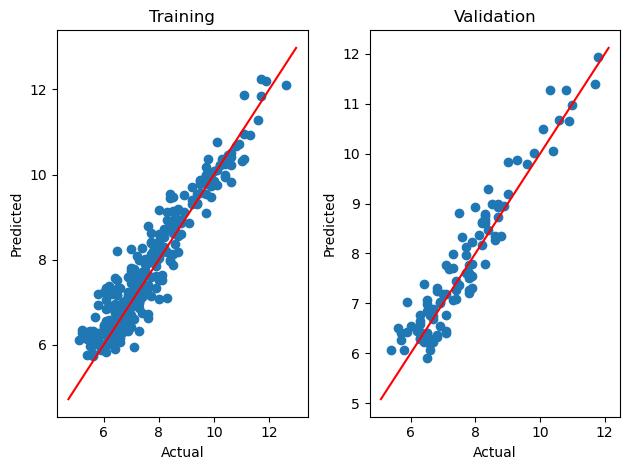

In [196]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=nn_model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=nn_model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [197]:
# metrics
pred = nn_model.predict(X_test)
pred

trainpreds = nn_model.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test

10/10 [==============================] - 0s 997us/step
0.37921044584180486
0.37717863718668615


In [66]:
# Evaluate the model using the test data
#model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
#print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

4/4 - 0s - loss: 0.0714 - accuracy: 0.0000e+00 - 78ms/epoch - 19ms/step
Loss: 0.07142380625009537, Accuracy: 0.0


In [ ]:
# if needed can create second model to try and optimize